In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HousingData.csv')
df.drop(columns='MEDV', inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
# df.fillna(df.mean(), inplace=True)

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

<Axes: >

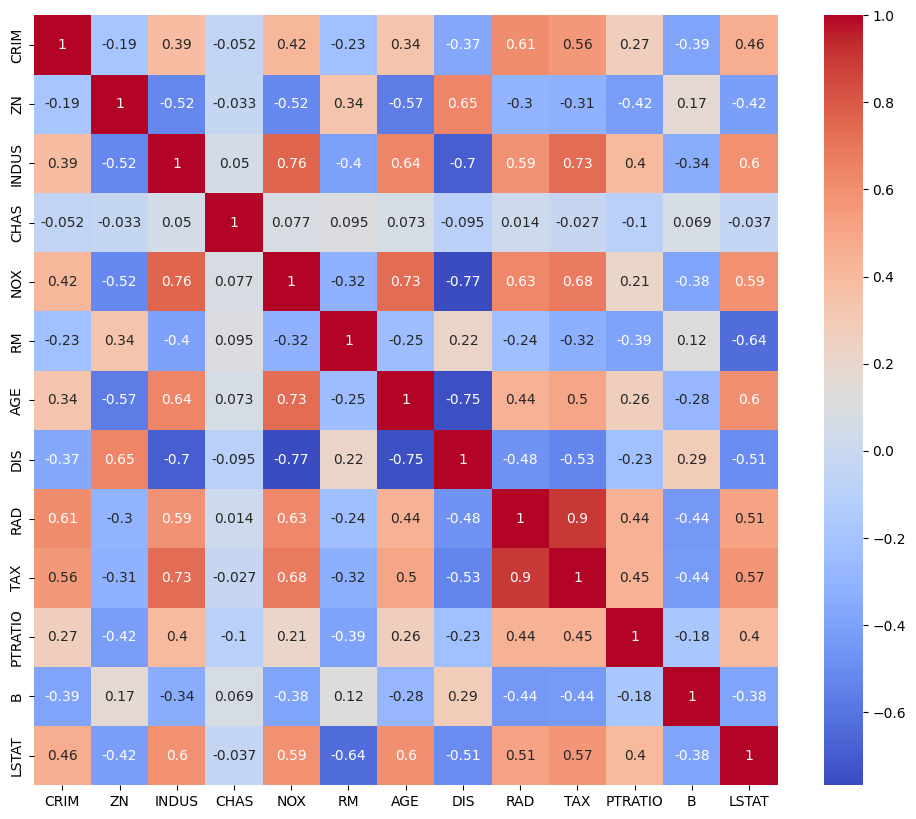

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [10]:
df.drop(columns='RAD', inplace=True)

<Axes: >

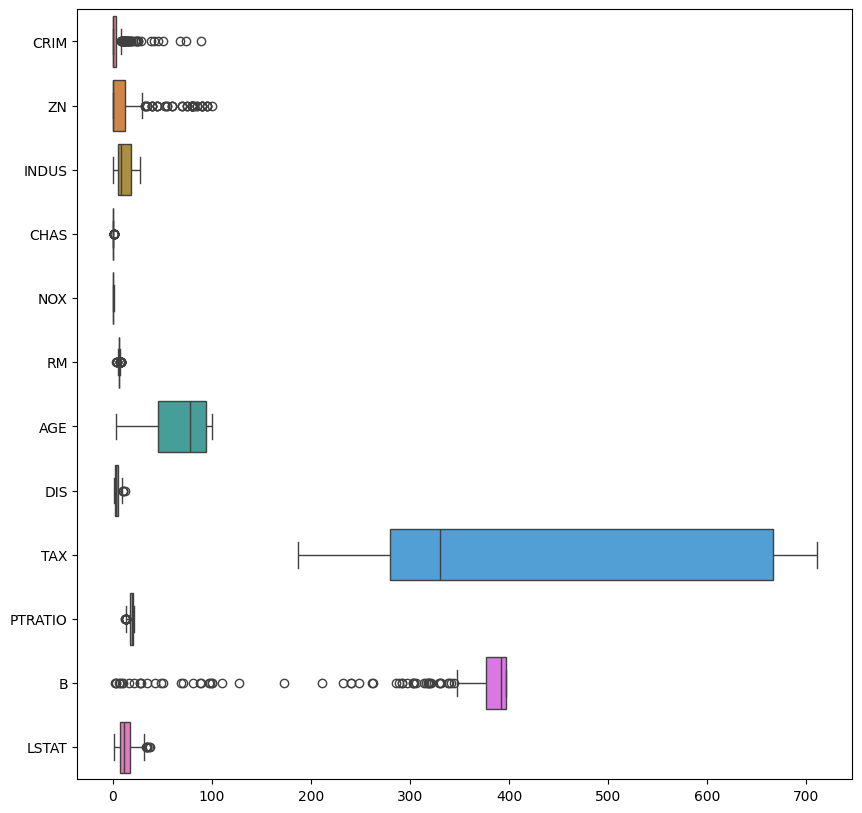

In [11]:
plt.figure(figsize=(10, 10))
sns.boxplot(df, orient='h')

In [12]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    mean_value = df[col].mean()
    df[col] = df[col].apply(lambda x : mean_value if x < lwr or x > upr else x)

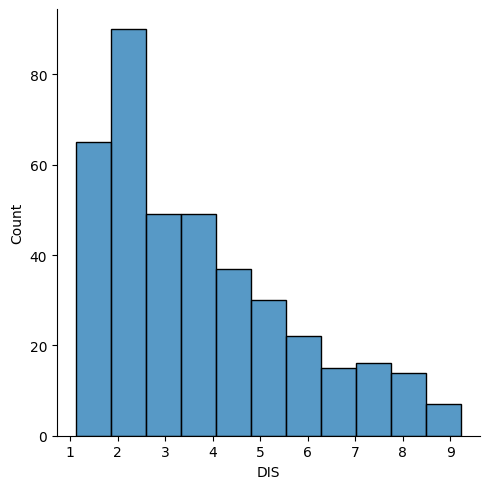

In [13]:
sns.displot(df['DIS'])
plt.show()

<Axes: >

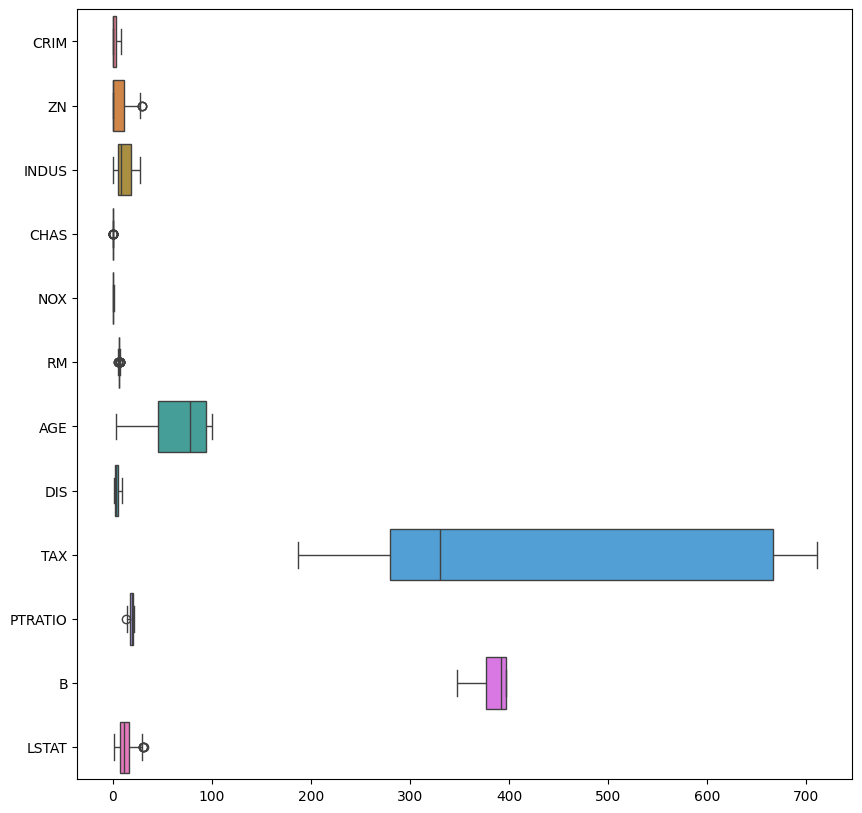

In [14]:
plt.figure(figsize=(10, 10))
sns.boxplot(df, orient='h')

In [15]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components #jumlah komponen utama
        self.mean = None #nilai mean
        self.components = None #vektor - vektor komponen utama
        self.explained_variance = None #varians yang dijelaskan tiap components

    def normalisasi(self, data):
        min_val = data.min(axis=0) #nilai minimum tiap fitur
        max_val = data.max(axis=0) #nilai maksimum tiap fitur
        range_val = max_val - min_val #rentang nilai
        norm = (data - min_val) / range_val #data yang dinormalisasi
        return norm

    def covariance_matrix(self, data):
        cov_matrix = np.cov(data, rowvar=False) #matriks kovariansi
        return cov_matrix

    def eigen(self, cov_matrix):
        eigval, eigvec = np.linalg.eig(cov_matrix) 
        #eigval = nilai eigen dari matriks kovarian
        #eigvec = vektor eigen dari matriks kovarian
        sorted_indices = np.argsort(eigval)[::-1] #nilai eigen yang diurutkan secara menurun
        sorted_eigval = eigval[sorted_indices] #nilai eigen yang diurutkan
        sorted_eigvec = eigvec[:, sorted_indices] #vektor eigen yang diurutkan
        return sorted_eigval, sorted_eigvec

    def fit(self, data):
        norm_data = self.normalisasi(data)
        cov_matrix = self.covariance_matrix(norm_data)
        eigval, eigvec = self.eigen(cov_matrix)
        self.components = eigvec[:, :self.n_components]
        self.explained_variance = eigval[:self.n_components] / np.sum(eigval)

    def transform(self, data):
        norm_data = self.normalisasi(data)
        return np.dot(norm_data, self.components)

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [16]:
explained_variance = []

for n in range(1, 11):
    pca = PCA(n_components=n)
    pca.fit(df)
    explained_variance.append(np.sum(pca.explained_variance))

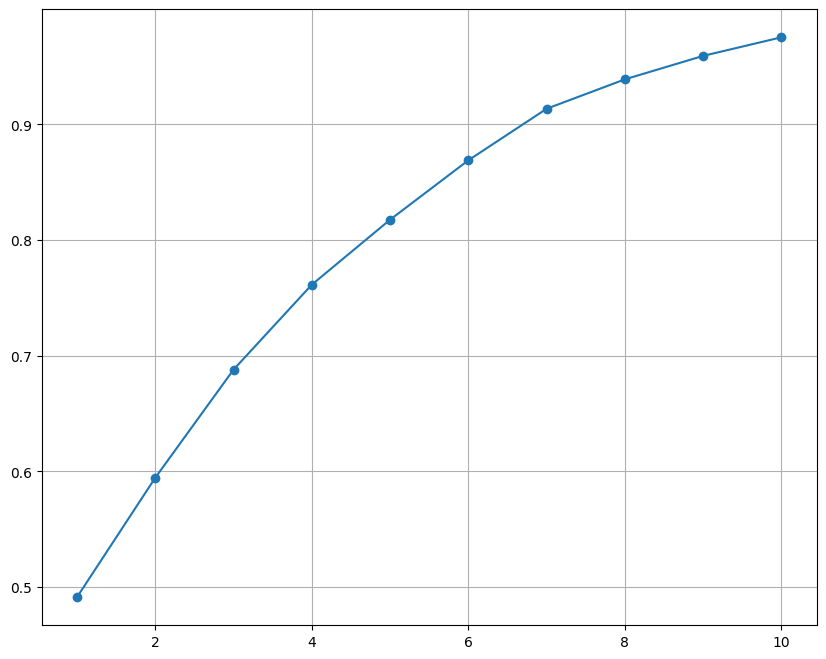

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = 'o')
plt.grid(True)
plt.show()

In [54]:
df[df['Cluster'] == 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Cluster
20,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,307,21.0,376.570000,21.02,1
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,307,21.0,358.490939,16.51,1
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,307,21.0,358.490939,17.28,1
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,307,21.0,360.170000,22.60,1
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,307,21.0,358.490939,27.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,711,20.1,395.090000,18.06,1
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,711,20.1,358.490939,23.97,1
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,711,20.1,358.490939,29.68,1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,711,20.1,390.110000,18.07,1


In [34]:
len(df.index)

394

In [35]:
df.to_csv('ready.csv', index=False)

In [20]:
df['CHAS'].unique()

array([0.        , 0.06852792])

In [21]:
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df)
df_pca

array([[ 0.07043724, -0.72758778, -0.19342587, ..., -0.86656965,
        -0.18154012,  0.26275259],
       [-0.16099831, -1.00382542, -0.22113198, ..., -0.41238399,
        -0.10225382,  0.41263234],
       [-0.03727203, -0.84576509, -0.22271659, ..., -0.40845335,
         0.15550318,  0.50261339],
       ...,
       [-0.49674759, -1.16066009, -0.30051954, ..., -0.35923165,
        -0.13711427,  0.61771588],
       [-0.48911084, -1.16094685, -0.23295994, ..., -0.53108765,
         0.07307127,  0.78596275],
       [-0.50838441, -1.09978284, -0.240518  , ..., -0.49019025,
         0.01878291,  0.76652532]])

In [22]:
df_pca

array([[ 0.07043724, -0.72758778, -0.19342587, ..., -0.86656965,
        -0.18154012,  0.26275259],
       [-0.16099831, -1.00382542, -0.22113198, ..., -0.41238399,
        -0.10225382,  0.41263234],
       [-0.03727203, -0.84576509, -0.22271659, ..., -0.40845335,
         0.15550318,  0.50261339],
       ...,
       [-0.49674759, -1.16066009, -0.30051954, ..., -0.35923165,
        -0.13711427,  0.61771588],
       [-0.48911084, -1.16094685, -0.23295994, ..., -0.53108765,
         0.07307127,  0.78596275],
       [-0.50838441, -1.09978284, -0.240518  , ..., -0.49019025,
         0.01878291,  0.76652532]])

In [44]:
class KMeans:
    def __init__(self, n_clusters, max_iters=1000, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.inertia_ = None

    def inisialisasi(self, data):
        np.random.seed(self.random_state)
        random_index = np.random.permutation(data.shape[0])
        self.centroids = data[random_index[:self.n_clusters]]

    def cluster(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update(self, data, labels):
        self.centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def fit(self, data):
        self.inisialisasi(data)
        for _ in range(self.max_iters):
            labels = self.cluster(data)
            new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self.inertia_ = np.sum([np.sum((data[labels == i] - self.centroids[i]) ** 2) for i in range(self.n_clusters)])
        return labels

    def silhouette_score(self, data, labels):
        unique_labels = np.unique(labels)
        if len(unique_labels) == 1:
            return 0

        silhouette_values = []
        for i in range(len(data)):
            same_cluster = data[labels == labels[i]]
            other_clusters = data[labels != labels[i]]

            a = np.mean(np.linalg.norm(same_cluster - data[i], axis=1))
            b = np.min([np.mean(np.linalg.norm(other_clusters[labels[labels != labels[i]] == label] - data[i], axis=1)) for label in unique_labels if label != labels[i]])

            silhouette_values.append((b - a) / max(a, b))
        return np.mean(silhouette_values)

In [45]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit(df_pca)
    silhouette_avg = kmeans.silhouette_score(df_pca, labels)
    silhouette_scores.append(silhouette_avg)

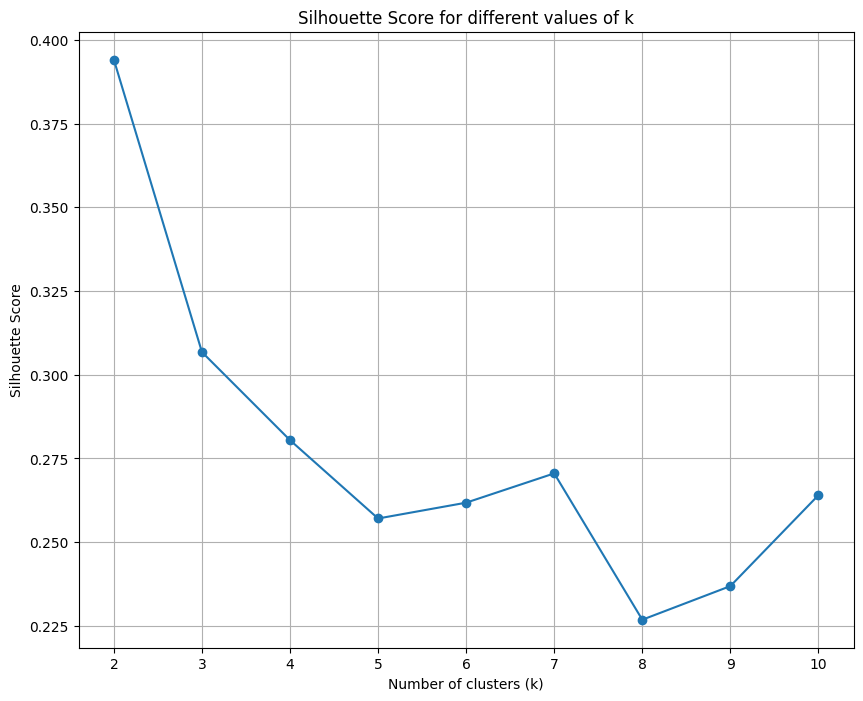

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different values of k')
plt.grid(True)
plt.show()

In [47]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

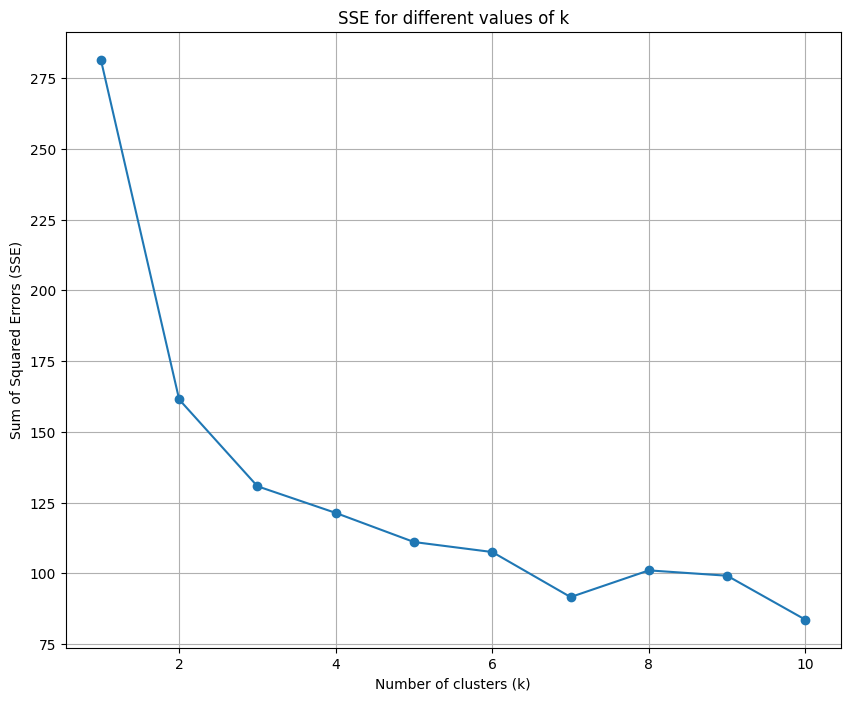

In [48]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE for different values of k')
plt.grid(True)
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3)
labels, centroids, inertia = kmeans.fit(df_pca), kmeans.centroids, kmeans.inertia_
print(f"Labels: {labels}")
print(f"Centroids: {centroids}")
print(f"Inertia: {inertia}")

Labels: [0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1]
Centroids: [[ 0.13395845 -0.58126317 -0.34477919 -0.80021511 -0.50891106 -0.26928622
   0.40164765]
 [-0.36763081 -0.88373533 -0.2285693  -0.51244352 -0.28865527 -0.16735252
   0.44805719]
 [-

In [59]:
df_pca_fix = pd.DataFrame(df_pca)
df_pca_fix['Cluster'] = labels
df_pca_fix.head()

,0,1,2,3,4,5,6,Cluster
0,0.070437,-0.727588,-0.193426,-0.775440,-0.866570,-0.181540,0.262753,0
1,-0.160998,-1.003825,-0.221132,-0.485578,-0.412384,-0.102254,0.412632,1
2,-0.037272,-0.845765,-0.222717,-0.569926,-0.408453,0.155503,0.502613,1
3,0.143019,-0.830269,-0.329467,-0.605363,-0.257109,0.108873,0.548076,0
4,0.047712,-0.882111,-0.315753,-0.521404,-0.254400,-0.055317,0.503935,1


In [60]:
df['Cluster'] = labels
df['Cluster'].value_counts()

Cluster
1    151
2    136
0    107
Name: count, dtype: int64

In [61]:
df[df['Cluster'] == 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Cluster
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,1
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311,15.2,386.63,29.93,1
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,307,21.0,396.90,8.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,391,19.2,395.77,15.10,1
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,391,19.2,396.90,14.33,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,1


In [62]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Cluster
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,1
